In [19]:
import pandas as pd

df = pd.read_csv('c:/data/cancer/LC.csv')
df.head()

# YES=1
# NO=0
# 오버샘플링
# 조인

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,M,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,F,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,M,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,F,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0


In [20]:
print(df)

    GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0        M   69        0               1        1              0   
1        M   74        1               0        0              0   
2        F   59        0               0        0              1   
3        M   63        1               1        1              0   
4        F   63        0               1        0              0   
..     ...  ...      ...             ...      ...            ...   
304      F   56        0               0        0              1   
305      M   70        1               0        0              0   
306      M   58        1               0        0              0   
307      M   67        1               0        1              0   
308      M   62        0               0        0              1   

     CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  \
0                  0         1         0         1                  1   
1                  1         1       

In [21]:
df.columns


Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [22]:
print(len(df.columns))

16


In [23]:
df.columns[2:15]

Index(['SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE',
       'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN'],
      dtype='object')

In [24]:
train_cols = df.columns[2:15]
X = df[train_cols]
y = df['LUNG_CANCER']

In [25]:
df.shape

(309, 16)

In [26]:
df['LUNG_CANCER'].value_counts()

1    270
0     39
Name: LUNG_CANCER, dtype: int64

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '분류\n (0: No, 1: Yes)')

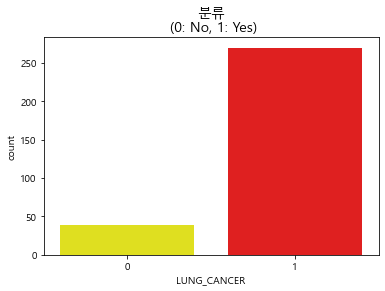

In [27]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)
import seaborn as sns

colors = ['yellow', 'red']

sns.countplot('LUNG_CANCER', data=df, palette=colors)
plt.title('분류\n (0: No, 1: Yes)', fontsize=14)

In [28]:
#오버샘플링
from imblearn.over_sampling import SMOTE
X_sample, y_sample = SMOTE(random_state=0).fit_resample(X,y)

X_samp = pd.DataFrame(data=X_sample, columns=train_cols)
y_samp = pd.DataFrame(data=y_sample, columns=['LUNG_CANCER'])
df = pd.concat([X_samp, y_samp], axis=1)

In [29]:
df['LUNG_CANCER'].value_counts()

0    270
1    270
Name: LUNG_CANCER, dtype: int64

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '분류\n (0: No, 1: Yes)')

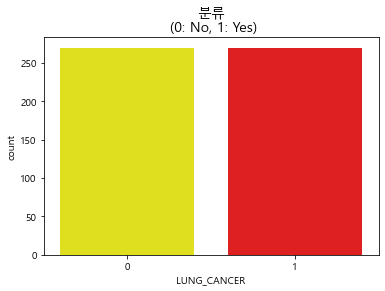

In [33]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)
import seaborn as sns

colors = ['yellow', 'red']

sns.countplot('LUNG_CANCER', data=df, palette=colors)
plt.title('분류\n (0: No, 1: Yes)', fontsize=14)

In [30]:
X = df[train_cols]
y = df['LUNG_CANCER']

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=10)

In [32]:
# 로지스틱 회귀분석
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(random_state=10)
logit.fit(X_train, y_train)

LogisticRegression(random_state=10)

In [16]:
print('학습용:', logit.score(X_train, y_train))
print('검증용:', logit.score(X_test, y_test))

학습용: 0.9193548387096774
검증용: 0.625
